In [11]:
# import helper
import pandas as pd
from utils import *

import time
import numpy as np
import math
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torch import nn

from IPython.display import Image

import torch
from torch import nn
from torch.utils.data import Dataset
import pennylane as qml
import torch.optim as optim
import torch.utils.data as data
import random
import tensorflow as tf

In [12]:
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({'font.size':20})
legend_prop = {'weight':'bold'}
from pylab import rcParams
rcParams['axes.linewidth'] = 2

In [13]:
df = pd.read_csv('dataset_FTSE_prediction_v1.csv')
df = df.drop([ 'Unnamed: 0'], axis=1)
df=df.drop(columns=['ARIMA'])
df=df[800:]

In [14]:
df

,Adj Close,BBB_20_2.0,BBL_20_2.0,BBM_20_2.0,BBP_20_2.0,BBU_20_2.0,CUMLOGRET_1,Close,Crude Futures,EMA_10,...,GBP USD,Gold in USD,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,SMA_10,SMA_20,SMA_50,Volume,Close_copy
800,6639.7,3.533963,6680.419909,6800.585,-0.169433,6920.750091,0.203211,6639.7,97.00,6745.857747,...,1.63,1221.2,-17.732464,-21.671968,3.939505,6763.72,6800.585,6759.916,927894000,6639.7
801,6649.4,4.020968,6655.511622,6792.065,-0.022378,6928.618378,0.204671,6649.4,97.00,6728.319975,...,1.63,1214.1,-24.779643,-22.975318,-1.804325,6747.96,6792.065,6757.914,589221500,6649.4
802,6646.6,4.406844,6633.669007,6783.130,0.043259,6932.590993,0.204250,6646.6,97.20,6713.461797,...,1.62,1217.5,-30.241910,-22.750068,-7.491842,6732.20,6783.130,6756.278,564786600,6646.6
803,6622.7,4.819363,6609.601955,6772.805,0.040128,6936.008045,0.200647,6622.7,94.67,6696.959652,...,1.62,1210.5,-36.083380,-22.873230,-13.210149,6715.25,6772.805,6752.826,882273900,6622.7
804,6557.5,5.366750,6575.684353,6757.000,-0.050146,6938.315647,0.190753,6557.5,94.16,6671.603352,...,1.62,1214.6,-45.449963,-25.791851,-19.658112,6692.91,6757.000,6748.012,789707300,6557.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,7426.1,5.115504,7210.146579,7399.405,0.570525,7588.663421,0.315145,7426.1,90.60,7423.197029,...,1.26,1918.1,-17.311680,14.831437,-32.143118,7416.99,7399.405,7474.952,448751100,7426.1
3135,7441.7,4.384831,7228.528220,7390.560,0.657809,7552.591780,0.317243,7441.7,89.92,7426.561205,...,1.25,1917.5,-14.436416,14.165362,-28.601777,7427.80,7390.560,7474.352,456225400,7441.7
3136,7478.2,4.210870,7232.704989,7388.260,0.789094,7543.815011,0.322136,7478.2,90.65,7435.950077,...,1.25,1918.4,-9.107517,15.595408,-24.702925,7441.76,7388.260,7473.286,651366100,7478.2
3137,7496.9,4.170076,7233.707713,7387.745,0.854314,7541.782287,0.324634,7496.9,90.64,7447.031881,...,1.25,1923.3,-3.336926,17.092799,-20.429725,7457.59,7387.745,7472.678,568717300,7496.9


In [15]:
target = "Close"
target_mean = df[target].mean()
target_stdev = df[target].std()

for c in df.columns:
    mean = df[c].mean()
    stdev = df[c].std()

    df[c] = (df[c] - mean) / stdev

In [16]:
features = list(df.columns.difference(["Close"]))
features

['Adj Close',
 'BBB_20_2.0',
 'BBL_20_2.0',
 'BBM_20_2.0',
 'BBP_20_2.0',
 'BBU_20_2.0',
 'CUMLOGRET_1',
 'Close_copy',
 'Crude Futures',
 'EMA_10',
 'EMA_20',
 'EMA_50',
 'FT3',
 'FT6',
 'FT9',
 'GBP USD ',
 'Gold in USD',
 'MACD_12_26_9',
 'MACDh_12_26_9',
 'MACDs_12_26_9',
 'SMA_10',
 'SMA_20',
 'SMA_50',
 'Volume']

In [17]:
len(features)

24

In [18]:
normalized_df=df.copy()

In [19]:
df

,Adj Close,BBB_20_2.0,BBL_20_2.0,BBM_20_2.0,BBP_20_2.0,BBU_20_2.0,CUMLOGRET_1,Close,Crude Futures,EMA_10,...,GBP USD,Gold in USD,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,SMA_10,SMA_20,SMA_50,Volume,Close_copy
800,-0.664382,-0.518756,-0.212867,-0.376660,-2.096023,-0.541526,-0.618721,-0.664382,1.732245,-0.477768,...,2.765372,-0.923083,-0.285174,-0.957418,0.029832,-0.442130,-0.376660,-0.460099,0.479939,-0.664382
801,-0.646763,-0.405198,-0.255201,-0.392525,-1.648446,-0.526270,-0.600796,-0.646763,1.732245,-0.510207,...,2.765372,-0.947383,-0.387140,-1.015113,-0.059456,-0.471115,-0.392525,-0.463963,-0.746811,-0.646763
802,-0.651849,-0.315221,-0.292326,-0.409164,-1.448674,-0.518568,-0.605967,-0.651849,1.742954,-0.537690,...,2.671345,-0.935746,-0.466173,-1.005142,-0.147868,-0.500101,-0.409164,-0.467120,-0.835320,-0.651849
803,-0.695260,-0.219031,-0.333231,-0.428391,-1.458203,-0.511942,-0.650199,-0.695260,1.607479,-0.568214,...,2.671345,-0.959704,-0.550693,-1.010594,-0.236759,-0.531275,-0.428391,-0.473782,0.314693,-0.695260
804,-0.813687,-0.091393,-0.390878,-0.457822,-1.732959,-0.507468,-0.771680,-0.813687,1.580170,-0.615116,...,2.671345,-0.945671,-0.686218,-1.139791,-0.336992,-0.572362,-0.457822,-0.483073,-0.020605,-0.813687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,0.764009,-0.149978,0.687472,0.738442,0.156114,0.753486,0.755674,0.764009,1.389541,0.775099,...,-0.713624,1.462017,-0.279086,0.658465,-0.531071,0.759355,0.738442,0.919877,-1.255627,0.764009
3135,0.792344,-0.320354,0.718714,0.721971,0.421769,0.683547,0.781440,0.792344,1.353128,0.781322,...,-0.807650,1.459964,-0.237484,0.628980,-0.476021,0.779237,0.721971,0.918719,-1.228554,0.792344
3136,0.858642,-0.360917,0.725812,0.717688,0.821349,0.666530,0.841517,0.858642,1.392218,0.798688,...,-0.807650,1.463044,-0.160380,0.692283,-0.415414,0.804912,0.717688,0.916662,-0.521709,0.858642
3137,0.892608,-0.370429,0.727517,0.716729,1.019851,0.662588,0.872183,0.892608,1.391683,0.819186,...,-0.807650,1.479814,-0.076886,0.758568,-0.348987,0.834026,0.716729,0.915488,-0.821082,0.892608


In [20]:
target_sensor = "Close"
features_ = list(df.columns.difference([target_sensor]))

forecast_lead = 20
target_ = f"{target_sensor}_lead{forecast_lead}"

df[target_] = df[target_sensor].shift(-forecast_lead)
df= df.iloc[:-forecast_lead]

In [21]:
len(df)

2319

In [22]:
df

,Adj Close,BBB_20_2.0,BBL_20_2.0,BBM_20_2.0,BBP_20_2.0,BBU_20_2.0,CUMLOGRET_1,Close,Crude Futures,EMA_10,...,Gold in USD,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,SMA_10,SMA_20,SMA_50,Volume,Close_copy,Close_lead20
800,-0.664382,-0.518756,-0.212867,-0.376660,-2.096023,-0.541526,-0.618721,-0.664382,1.732245,-0.477768,...,-0.923083,-0.285174,-0.957418,0.029832,-0.442130,-0.376660,-0.460099,0.479939,-0.664382,-1.064891
801,-0.646763,-0.405198,-0.255201,-0.392525,-1.648446,-0.526270,-0.600796,-0.646763,1.732245,-0.510207,...,-0.947383,-0.387140,-1.015113,-0.059456,-0.471115,-0.392525,-0.463963,-0.746811,-0.646763,-1.120290
802,-0.651849,-0.315221,-0.292326,-0.409164,-1.448674,-0.518568,-0.605967,-0.651849,1.742954,-0.537690,...,-0.935746,-0.466173,-1.005142,-0.147868,-0.500101,-0.409164,-0.467120,-0.835320,-0.651849,-1.166063
803,-0.695260,-0.219031,-0.333231,-0.428391,-1.458203,-0.511942,-0.650199,-0.695260,1.607479,-0.568214,...,-0.959704,-0.550693,-1.010594,-0.236759,-0.531275,-0.428391,-0.473782,0.314693,-0.695260,-1.095769
804,-0.813687,-0.091393,-0.390878,-0.457822,-1.732959,-0.507468,-0.771680,-0.813687,1.580170,-0.615116,...,-0.945671,-0.686218,-1.139791,-0.336992,-0.572362,-0.457822,-0.483073,-0.020605,-0.813687,-1.001863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,1.056807,-0.167909,1.004558,1.089395,-0.063075,1.122589,1.019357,1.056807,1.226221,1.069591,...,1.452777,0.178068,-0.417690,0.337989,1.110143,1.089395,1.045698,1.099225,1.056807,0.764009
3115,1.113660,-0.243757,1.040336,1.106005,0.126853,1.116363,1.069905,1.113660,1.164641,1.081762,...,1.449354,0.204288,-0.269592,0.314151,1.096496,1.106005,1.050650,-0.574104,1.113660,0.792344
3116,0.942195,-0.320506,1.069033,1.114348,-0.762417,1.101000,0.916814,0.942195,1.186596,1.059973,...,1.444220,0.113218,-0.438184,0.275513,1.065212,1.114348,1.047442,-1.089264,0.942195,0.858642
3117,0.911316,-0.436758,1.109637,1.123733,-1.079172,1.074223,0.889041,0.911316,1.154467,1.036429,...,1.436349,0.020630,-0.576776,0.224708,1.029863,1.123733,1.043860,1.301905,0.911316,0.892608


We identify the dependent and independent variables:

In [23]:
target = "Close_lead20"

In [24]:
torch.manual_seed(42)
random.seed(42)

Next, in order to ensure that some values due to their mangnitude do not inherently dominate the features, we standardize their values.

In [25]:
df_t=df[:len(df)-forecast_lead]
df_tail=df[len(df)-forecast_lead:len(df)]

In [26]:
len(df_t)

2299

In [27]:
len(df_tail)

20

In [28]:
df_t

,Adj Close,BBB_20_2.0,BBL_20_2.0,BBM_20_2.0,BBP_20_2.0,BBU_20_2.0,CUMLOGRET_1,Close,Crude Futures,EMA_10,...,Gold in USD,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,SMA_10,SMA_20,SMA_50,Volume,Close_copy,Close_lead20
800,-0.664382,-0.518756,-0.212867,-0.376660,-2.096023,-0.541526,-0.618721,-0.664382,1.732245,-0.477768,...,-0.923083,-0.285174,-0.957418,0.029832,-0.442130,-0.376660,-0.460099,0.479939,-0.664382,-1.064891
801,-0.646763,-0.405198,-0.255201,-0.392525,-1.648446,-0.526270,-0.600796,-0.646763,1.732245,-0.510207,...,-0.947383,-0.387140,-1.015113,-0.059456,-0.471115,-0.392525,-0.463963,-0.746811,-0.646763,-1.120290
802,-0.651849,-0.315221,-0.292326,-0.409164,-1.448674,-0.518568,-0.605967,-0.651849,1.742954,-0.537690,...,-0.935746,-0.466173,-1.005142,-0.147868,-0.500101,-0.409164,-0.467120,-0.835320,-0.651849,-1.166063
803,-0.695260,-0.219031,-0.333231,-0.428391,-1.458203,-0.511942,-0.650199,-0.695260,1.607479,-0.568214,...,-0.959704,-0.550693,-1.010594,-0.236759,-0.531275,-0.428391,-0.473782,0.314693,-0.695260,-1.095769
804,-0.813687,-0.091393,-0.390878,-0.457822,-1.732959,-0.507468,-0.771680,-0.813687,1.580170,-0.615116,...,-0.945671,-0.686218,-1.139791,-0.336992,-0.572362,-0.457822,-0.483073,-0.020605,-0.813687,-1.001863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3094,0.745845,0.073581,0.741020,0.867071,-0.409958,0.960257,0.739128,0.745845,0.827827,0.702577,...,1.592412,-1.117447,-0.487024,-1.029519,0.728494,0.867071,1.130553,0.720325,0.745845,1.056807
3095,0.789620,0.000304,0.745441,0.849557,-0.192248,0.918743,0.778965,0.789620,0.894762,0.721481,...,1.602680,-0.987966,-0.072325,-1.036038,0.722700,0.849557,1.120425,-0.763776,0.789620,1.113660
3096,0.779448,-0.104919,0.756830,0.830181,-0.166833,0.865403,0.769720,0.779448,0.814976,0.735065,...,1.605760,-0.882052,0.201754,-1.018495,0.704879,0.830181,1.107155,-0.633663,0.779448,0.942195
3097,0.728227,-0.166597,0.758489,0.813226,-0.327520,0.828203,0.723058,0.728227,0.741616,0.736695,...,1.579407,-0.821893,0.309028,-0.991534,0.682643,0.813226,1.092796,-1.288361,0.728227,0.911316


In [29]:
target

'Close_lead20'

In [30]:
df_tail

,Adj Close,BBB_20_2.0,BBL_20_2.0,BBM_20_2.0,BBP_20_2.0,BBU_20_2.0,CUMLOGRET_1,Close,Crude Futures,EMA_10,...,Gold in USD,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,SMA_10,SMA_20,SMA_50,Volume,Close_copy,Close_lead20
3099,1.058442,-0.197170,0.759600,0.805163,1.215927,0.810145,1.020813,1.058442,0.793022,0.813275,...,1.665310,-0.461322,1.026762,-0.856193,0.697375,0.805163,1.074905,0.337192,1.058442,0.638316
3100,1.163610,-0.071602,0.737486,0.818580,1.469211,0.863311,1.114146,1.163610,0.802660,0.881298,...,1.633824,-0.193846,1.476452,-0.726742,0.764615,0.818580,1.071644,-0.571759,1.163610,0.553492
3101,1.195578,0.062926,0.717628,0.837369,1.372010,0.925091,1.142377,1.195578,0.879233,0.942872,...,1.620134,0.037912,1.748784,-0.573382,0.839433,0.837369,1.068135,-1.044816,1.195578,0.466670
3102,1.222642,0.189973,0.701614,0.858319,1.274101,0.986985,1.166226,1.222642,0.968657,0.998262,...,1.606444,0.235929,1.884066,-0.408146,0.913884,0.858319,1.064310,-0.990931,1.222642,0.458314
3103,1.246618,0.308319,0.688300,0.879761,1.186365,1.046826,1.187316,1.246618,1.016850,1.048020,...,1.612605,0.403292,1.917264,-0.239996,0.989161,0.879761,1.062021,-1.270332,1.246618,0.481927
3104,1.219554,0.394551,0.679239,0.896186,0.993713,1.091364,1.163508,1.219554,0.978296,1.083720,...,1.635877,0.512296,1.800990,-0.082053,1.037127,0.896186,1.060234,0.043327,1.219554,0.572201
3105,1.248434,0.481088,0.673690,0.916772,0.967462,1.140563,1.188912,1.248434,1.048979,1.118276,...,1.555450,0.609887,1.680034,0.065270,1.083585,0.916772,1.058323,0.610529,1.248434,0.595995
3106,1.251159,0.555957,0.666510,0.931930,0.892861,1.180319,1.191306,1.251159,1.089139,1.147054,...,1.606787,0.680802,1.517979,0.198367,1.131349,0.931930,1.055907,-0.297114,1.251159,0.605077
3107,1.260422,0.626353,0.661268,0.947954,0.840981,1.219668,1.199442,1.260422,1.119661,1.172315,...,1.641353,0.734164,1.345375,0.316310,1.185237,0.947954,1.053143,-0.729063,1.260422,0.605077
3108,1.200300,0.668330,0.661697,0.961604,0.631606,1.247603,1.146542,1.200300,1.084855,1.181851,...,1.539364,0.729075,1.064229,0.409571,1.224338,0.961604,1.049411,-0.863359,1.200300,0.834666


## Data processing for regression model

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def cal_metrics(y_true,y_pred):
    mae=0
    rmse=0
    for i in range(len(y_true)):
        y1=y_true[i].flatten().numpy()* target_stdev + target_mean
        y2=y_pred[i].flatten()* target_stdev + target_mean
        mae=mean_absolute_error(y1, y2)+mae
        rmse=mean_squared_error(y1, y2, squared=False)+rmse  
    return mae/len(y_true) , rmse/len(y_true)

In [32]:
features

['Adj Close',
 'BBB_20_2.0',
 'BBL_20_2.0',
 'BBM_20_2.0',
 'BBP_20_2.0',
 'BBU_20_2.0',
 'CUMLOGRET_1',
 'Close_copy',
 'Crude Futures',
 'EMA_10',
 'EMA_20',
 'EMA_50',
 'FT3',
 'FT6',
 'FT9',
 'GBP USD ',
 'Gold in USD',
 'MACD_12_26_9',
 'MACDh_12_26_9',
 'MACDs_12_26_9',
 'SMA_10',
 'SMA_20',
 'SMA_50',
 'Volume']

In [33]:
target

'Close_lead20'

In [34]:
X_reg=df_t[features]
y_reg=df_t[target]

In [35]:
# Train test split
m=np.array(X_reg).shape[0] # get first dimension
size=int(m*0.9)
X_train_reg=X_reg[:size]
y_train_reg=y_reg[:size]
X_test_reg=X_reg[size:]
y_test_reg=y_reg[size:]
print('Shape of train is',np.array(X_train_reg).shape,'and',np.array(y_train_reg).shape)
print('Shape os test is',np.array(X_test_reg).shape,'and',np.array(y_test_reg).shape)

Shape of train is (2069, 24) and (2069,)
Shape os test is (230, 24) and (230,)


In [36]:
X_check_reg=df_tail[features]
y_check_reg=df_tail['Close_lead20']

In [37]:
X_check_reg

,Adj Close,BBB_20_2.0,BBL_20_2.0,BBM_20_2.0,BBP_20_2.0,BBU_20_2.0,CUMLOGRET_1,Close_copy,Crude Futures,EMA_10,...,FT9,GBP USD,Gold in USD,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,SMA_10,SMA_20,SMA_50,Volume
3099,1.058442,-0.197170,0.759600,0.805163,1.215927,0.810145,1.020813,1.058442,0.793022,0.813275,...,0.006289,-0.337516,1.665310,-0.461322,1.026762,-0.856193,0.697375,0.805163,1.074905,0.337192
3100,1.163610,-0.071602,0.737486,0.818580,1.469211,0.863311,1.114146,1.163610,0.802660,0.881298,...,-0.016173,-0.431543,1.633824,-0.193846,1.476452,-0.726742,0.764615,0.818580,1.071644,-0.571759
3101,1.195578,0.062926,0.717628,0.837369,1.372010,0.925091,1.142377,1.195578,0.879233,0.942872,...,-0.038728,-0.431543,1.620134,0.037912,1.748784,-0.573382,0.839433,0.837369,1.068135,-1.044816
3102,1.222642,0.189973,0.701614,0.858319,1.274101,0.986985,1.166226,1.222642,0.968657,0.998262,...,-0.061374,-0.431543,1.606444,0.235929,1.884066,-0.408146,0.913884,0.858319,1.064310,-0.990931
3103,1.246618,0.308319,0.688300,0.879761,1.186365,1.046826,1.187316,1.246618,1.016850,1.048020,...,-0.084109,-0.525570,1.612605,0.403292,1.917264,-0.239996,0.989161,0.879761,1.062021,-1.270332
3104,1.219554,0.394551,0.679239,0.896186,0.993713,1.091364,1.163508,1.219554,0.978296,1.083720,...,-0.106930,-0.431543,1.635877,0.512296,1.800990,-0.082053,1.037127,0.896186,1.060234,0.043327
3105,1.248434,0.481088,0.673690,0.916772,0.967462,1.140563,1.188912,1.248434,1.048979,1.118276,...,-0.129834,-0.431543,1.555450,0.609887,1.680034,0.065270,1.083585,0.916772,1.058323,0.610529
3106,1.251159,0.555957,0.666510,0.931930,0.892861,1.180319,1.191306,1.251159,1.089139,1.147054,...,-0.152819,-0.525570,1.606787,0.680802,1.517979,0.198367,1.131349,0.931930,1.055907,-0.297114
3107,1.260422,0.626353,0.661268,0.947954,0.840981,1.219668,1.199442,1.260422,1.119661,1.172315,...,-0.175882,-0.431543,1.641353,0.734164,1.345375,0.316310,1.185237,0.947954,1.053143,-0.729063
3108,1.200300,0.668330,0.661697,0.961604,0.631606,1.247603,1.146542,1.200300,1.084855,1.181851,...,-0.199021,-0.525570,1.539364,0.729075,1.064229,0.409571,1.224338,0.961604,1.049411,-0.863359


In [38]:
y_check_reg

3099    0.638316
3100    0.553492
3101    0.466670
3102    0.458314
3103    0.481927
3104    0.572201
3105    0.595995
3106    0.605077
3107    0.605077
3108    0.834666
3109    0.850468
3110    0.787622
3111    0.833758
3112    0.812506
3113    0.785442
3114    0.764009
3115    0.792344
3116    0.858642
3117    0.892608
3118    0.892608
Name: Close_lead20, dtype: float64

## ANN

In [39]:
from tensorflow.keras import regularizers, initializers
from keras.layers import Input, Dense, Reshape, Embedding, concatenate, Dropout, Flatten
from keras.layers.merge import Dot
from keras.preprocessing import sequence
from keras import Model

In [40]:
input_ = Input((len(features)),) # feature

den1=Dense(256, use_bias=True,activation='relu')(input_)

den2=Dense(128, use_bias=True,activation='relu')(den1)

den3=Dense(64, use_bias=True,activation='relu')(den2)

den4=Dense(32, use_bias=True,activation='relu')(den3)

den5=Dense(1, use_bias=True,activation='linear')(den4)

model = Model(inputs=[input_], outputs=den5)

In [41]:
import tensorflow as tf

In [42]:
loss_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(opt, loss=loss_fn)

In [43]:
model_history = model.fit(X_train_reg, y_train_reg,
                    validation_data=(X_test_reg, y_test_reg),
                   batch_size=32, 
                   epochs=500 , shuffle=True
                   )

Epoch 1/500
65/65 [==============================] - 1s 7ms/step - loss: 0.2287 - val_loss: 0.3858
Epoch 2/500
65/65 [==============================] - 0s 3ms/step - loss: 0.1231 - val_loss: 0.5260
Epoch 3/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0809 - val_loss: 0.7754
Epoch 4/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0685 - val_loss: 0.6359
Epoch 5/500
65/65 [==============================] - 0s 4ms/step - loss: 0.0707 - val_loss: 1.2353
Epoch 6/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0491 - val_loss: 1.2081
Epoch 7/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0460 - val_loss: 1.8857
Epoch 8/500
65/65 [==============================] - 0s 4ms/step - loss: 0.0564 - val_loss: 2.3727
Epoch 9/500
65/65 [==============================] - 0s 4ms/step - loss: 0.0448 - val_loss: 1.5363
Epoch 10/500
65/65 [==============================] - 0s 4ms/step - loss: 0.0358 - val_loss: 1.0235
Epoch 11/

65/65 [==============================] - 0s 3ms/step - loss: 0.0090 - val_loss: 1.4307
Epoch 84/500
65/65 [==============================] - 0s 4ms/step - loss: 0.0096 - val_loss: 1.6916
Epoch 85/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0093 - val_loss: 1.3707
Epoch 86/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0101 - val_loss: 1.5151
Epoch 87/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0105 - val_loss: 1.7285
Epoch 88/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0143 - val_loss: 1.6532
Epoch 89/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0124 - val_loss: 1.4200
Epoch 90/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 1.5651
Epoch 91/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 1.3934
Epoch 92/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0091 - val_loss: 1.2259
Epoch 93/500


65/65 [==============================] - 0s 2ms/step - loss: 0.0062 - val_loss: 1.5166
Epoch 165/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0070 - val_loss: 1.3113
Epoch 166/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0065 - val_loss: 1.4876
Epoch 167/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0060 - val_loss: 1.4770
Epoch 168/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 1.0852
Epoch 169/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 1.1748
Epoch 170/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0057 - val_loss: 1.1874
Epoch 171/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0054 - val_loss: 1.3247
Epoch 172/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0050 - val_loss: 1.1964
Epoch 173/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 1.2043
Epoc

65/65 [==============================] - 0s 2ms/step - loss: 0.0040 - val_loss: 1.2607
Epoch 246/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 1.1402
Epoch 247/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 1.1952
Epoch 248/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 1.0449
Epoch 249/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 1.1254
Epoch 250/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 1.1630
Epoch 251/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 1.0780
Epoch 252/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 1.2186
Epoch 253/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0039 - val_loss: 1.0988
Epoch 254/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 1.0933
Epoc

65/65 [==============================] - 0s 2ms/step - loss: 0.0058 - val_loss: 1.2694
Epoch 327/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 1.0667
Epoch 328/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0042 - val_loss: 1.6777
Epoch 329/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 1.4101
Epoch 330/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0038 - val_loss: 1.1992
Epoch 331/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 1.4072
Epoch 332/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0036 - val_loss: 1.2795
Epoch 333/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 1.3152
Epoch 334/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0025 - val_loss: 1.2681
Epoch 335/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 1.2259
Epoc

65/65 [==============================] - 0s 4ms/step - loss: 0.0020 - val_loss: 1.1935
Epoch 408/500
65/65 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 1.2795
Epoch 409/500
65/65 [==============================] - 0s 4ms/step - loss: 0.0147 - val_loss: 1.4732
Epoch 410/500
65/65 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 1.6500
Epoch 411/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 1.3074
Epoch 412/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 1.2291
Epoch 413/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 1.2671
Epoch 414/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0026 - val_loss: 1.3460
Epoch 415/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 1.1278
Epoch 416/500
65/65 [==============================] - 0s 3ms/step - loss: 0.0017 - val_loss: 1.1687
Epoc

65/65 [==============================] - 0s 2ms/step - loss: 0.0034 - val_loss: 1.1930
Epoch 489/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0044 - val_loss: 1.2023
Epoch 490/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 1.4278
Epoch 491/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0024 - val_loss: 1.3244
Epoch 492/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 1.2161
Epoch 493/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0028 - val_loss: 1.3310
Epoch 494/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 1.1347
Epoch 495/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 1.3091
Epoch 496/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 1.2558
Epoch 497/500
65/65 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 1.1963
Epoc

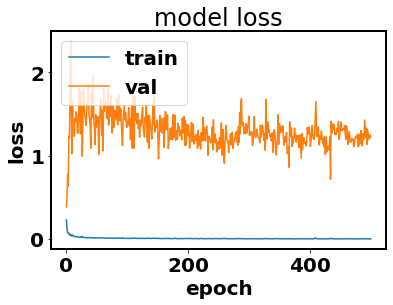

In [44]:
import keras
from matplotlib import pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
# Predict the model 
y_train_pred_ann = model.predict(X_train_reg) 
mae_train_ann = mean_absolute_error(y_train_reg* target_stdev + target_mean, y_train_pred_ann* target_stdev + target_mean)
print('MAE train: ',mae_train_ann)
rmse_train_ann = mean_squared_error(y_train_reg* target_stdev + target_mean, y_train_pred_ann* target_stdev + target_mean, squared=False)
print('RMSE train: ',rmse_train_ann)

MAE train:  14.779116902413618
RMSE train:  20.77455338662649


In [46]:
# Predict the model 
y_test_pred_ann = model.predict(X_test_reg) 
mae_test_ann = mean_absolute_error(y_test_reg* target_stdev + target_mean, y_test_pred_ann* target_stdev + target_mean)
print('MAE test: ',mae_test_ann)
rmse_test_ann = mean_squared_error(y_test_reg* target_stdev + target_mean, y_test_pred_ann* target_stdev + target_mean, squared=False)
print('RMSE test: ',rmse_test_ann)

MAE test:  449.360541355299
RMSE test:  609.7019036680675


In [47]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense (Dense)               (None, 256)               6400      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 49,665
Trainable params: 49,665
Non-trainable p

In [48]:
y_check_pred_nn = model.predict(X_check_reg)
mae_check_nn = mean_absolute_error(y_check_reg.values* target_stdev + target_mean, y_check_pred_nn* target_stdev + target_mean)
print('Mean absolute Error : ',mae_check_nn)
rmse_check_nn = mean_squared_error(y_check_reg.values* target_stdev + target_mean, y_check_pred_nn* target_stdev + target_mean, squared=False)
print('Root Mean Squared Error : ',rmse_check_nn)

Mean absolute Error :  660.670791015625
Root Mean Squared Error :  719.4064296793035


## Comparison

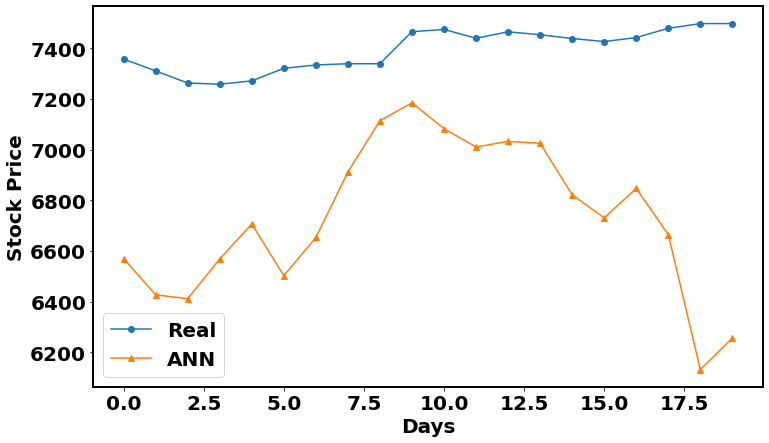

In [49]:
plt.figure(figsize=(12, 7))
# plt.plot(y_test_reg* target_stdev + target_mean, label = "Real",marker='o')
plt.plot(y_check_reg.values* target_stdev + target_mean, label = "Real",marker='o')
# plt.plot(y_check_pred_lstm* target_stdev + target_mean, label = "LSTM Prediction",marker='^')
# plt.plot(y_check_pred_arima* target_stdev + target_mean, label = "ARIMA Prediction",marker='^')
# plt.plot(y_check_pred_mlr* target_stdev + target_mean, label = "MLR Prediction",marker='^')
# plt.plot(y_check_pred_xg* target_stdev + target_mean, label = "XG boost",marker='^')
plt.plot(y_check_pred_nn* target_stdev + target_mean, label = "ANN",marker='^')
plt.ylabel('Stock Price')
plt.xlabel('Days')
# plt.title('Next ''+' days prediction')
plt.legend()
plt.show()